In [1]:
from ising_model import PairwiseIsingModelInferencer, PairwiseIsingModel, ConfigurationIterator
import numpy as np

In [2]:
n_sites = 12
ising_model = PairwiseIsingModel(n_sites)
ising_model.J = np.random.rand(n_sites, n_sites)
ising_model.H = np.random.rand(n_sites)

inferencer = PairwiseIsingModelInferencer(ising_model)
inferencer.update_partition_function()

In [3]:
n_samples = 10000
observation_dataset = np.random.randint(0, 2, (n_samples, n_sites))

In [10]:
from ising_trainer import PairwiseIsingModelTrainer
trainer = PairwiseIsingModelTrainer(ising_model, inferencer)
loss_record = []
def on_epoch_end(ctx):
    epoch = ctx.epoch
    epochs = ctx.epochs
    loss = ctx.loss
    kl_loss = ctx.kl_loss
    l2_loss = ctx.l2_loss
    
    print(f"Epoch {epoch + 1}/{epochs}, Total Loss: {loss}, KL Loss: {kl_loss}, L2 Loss: {l2_loss}")
    loss_record.append(loss)

trained_model = trainer.train(observation_dataset, epochs=100, learning_rate=0.01, epoch_callback=on_epoch_end)


Epoch 1/100, Total Loss: 10.806945532052394, KL Loss: 10.796013618652745, L2 Loss: 0.010931913399649334
Epoch 2/100, Total Loss: 10.805289961976042, KL Loss: 10.79444200999453, L2 Loss: 0.010847951981513027
Epoch 3/100, Total Loss: 10.80363889679535, KL Loss: 10.792874194495122, L2 Loss: 0.010764702300229464
Epoch 4/100, Total Loss: 10.801992300496838, KL Loss: 10.791310142763031, L2 Loss: 0.010682157733807053
Epoch 5/100, Total Loss: 10.800350137414382, KL Loss: 10.789749825683883, L2 Loss: 0.0106003117304994
Epoch 6/100, Total Loss: 10.79871237222528, KL Loss: 10.788193214417355, L2 Loss: 0.010519157807926087
Epoch 7/100, Total Loss: 10.79707896994641, KL Loss: 10.786640280394202, L2 Loss: 0.010438689552208091
Epoch 8/100, Total Loss: 10.795449895930384, KL Loss: 10.785090995313265, L2 Loss: 0.010358900617118166
Epoch 9/100, Total Loss: 10.793825115861797, KL Loss: 10.78354533113856, L2 Loss: 0.010279784723236964
Epoch 10/100, Total Loss: 10.792204595753546, KL Loss: 10.7820032600964

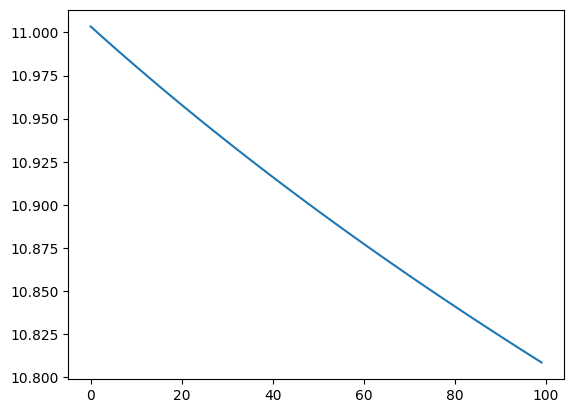

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(100), loss_record)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_alignment(observation_dataset, inferencer):
    """Plot alignment between observation averages and model averages."""
    n_sites = observation_dataset.shape[1]

    # Compute observation averages
    essembly_average_obs_sisj = np.einsum('ki,kj->ij', observation_dataset, observation_dataset) / observation_dataset.shape[0]
    essembly_average_obs_si = np.mean(observation_dataset, axis=0)

    # Compute model averages
    essembly_average_model_sisj = inferencer.essembly_average_sisj()
    essembly_average_model_si = inferencer.essembly_average_si()

    # Flatten the pairwise correlation matrices for plotting
    obs_sisj_flat = essembly_average_obs_sisj.flatten()
    model_sisj_flat = essembly_average_model_sisj.flatten()

    # Plot pairwise correlations
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(obs_sisj_flat, model_sisj_flat, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')  # y = x line
    plt.xlabel("Observation $\langle s_i s_j \\rangle_{\\text{obs}}$")
    plt.ylabel("Model $\langle s_i s_j \\rangle_{\\text{model}}$")
    plt.title("Pairwise Correlations Alignment")
    plt.xlim([0.,1.])
    plt.ylim([0.,1.])
    
    # Plot single-site averages
    plt.subplot(1, 2, 2)
    plt.scatter(essembly_average_obs_si, essembly_average_model_si, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')  # y = x line
    plt.xlabel("Observation $\langle s_i \\rangle_{\\text{obs}}$")
    plt.ylabel("Model $\langle s_i \\rangle_{\\text{model}}$")
    plt.title("Single-Site Averages Alignment")

    plt.tight_layout()
    plt.xlim([0.,1.])
    plt.ylim([0.,1.])

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_32981/1655776466.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Observation $\langle s_i s_j \\rangle_{\\text{obs}}$")
/tmp/ipykernel_32981/1655776466.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Model $\langle s_i s_j \\rangle_{\\text{model}}$")
/tmp/ipykernel_32981/1655776466.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("Observation $\langle s_i \\rangle_{\\text{obs}}$")
/tmp/ipykernel_32981/1655776466.py:37: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Model $\langle s_i \\rangle_{\\text{model}}$")


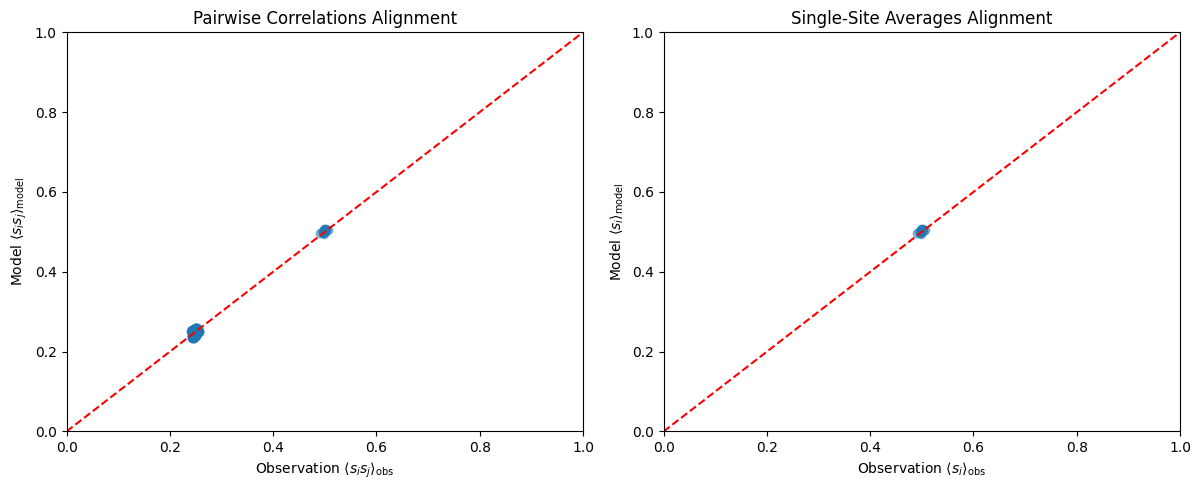

In [12]:
plot_alignment(observation_dataset, inferencer)
